In [24]:
import zipfile
import pandas as pd
import numpy as np
import timeit

with zipfile.ZipFile('household_power_consumption.zip', 'r') as archive:
    filename = archive.namelist()[0]
    with archive.open(filename) as file:
        df = pd.read_csv(file, sep=';', header=0, low_memory=False)

numeric_columns = [
    'Global_active_power', 'Global_reactive_power', 'Voltage',
    'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3'
]

df.replace('?', np.nan, inplace=True)

for col in numeric_columns:
    df[col] = pd.to_numeric(df[col], errors='coerce')

df_clean = df.dropna()

numpy_array = df_clean[numeric_columns].to_numpy()

def pandas_task_1(df):
    return df[df['Global_active_power'] > 5]

def numpy_task_1(arr):
    return arr[arr[:, 0] > 5]

pandas_time = timeit.timeit(lambda: pandas_task_1(df_clean), number=5) / 5
numpy_time = timeit.timeit(lambda: numpy_task_1(numpy_array), number=5) / 5

pandas_result_1 = pandas_task_1(df_clean)
numpy_result_1 = numpy_task_1(numpy_array)

print(f"Pandas время: {pandas_time:.6f} секунд")
print(f"Numpy время: {numpy_time:.6f} секунд")
print(f"Pandas количество записей: {pandas_result_1.shape[0]}")
print(f"Numpy количество записей: {numpy_result_1.shape[0]}")


Pandas время: 0.002634 секунд
Numpy время: 0.004296 секунд
Pandas количество записей: 17547
Numpy количество записей: 17547


In [25]:
def pandas_task_2(df):
    return df[df['Voltage'] > 235]

def numpy_task_2(arr):
    return arr[arr[:, 2] > 235]

pandas_time_2 = timeit.timeit(lambda: pandas_task_2(df_clean), number=5) / 5
numpy_time_2 = timeit.timeit(lambda: numpy_task_2(numpy_array), number=5) / 5

pandas_result_2 = pandas_task_2(df_clean)
numpy_result_2 = numpy_task_2(numpy_array)

print(f"Pandas время (Voltage > 235): {pandas_time_2:.6f} секунд")
print(f"Numpy время (Voltage > 235): {numpy_time_2:.6f} секунд")
print(f"Pandas количество записей: {pandas_result_2.shape[0]}")
print(f"Numpy количество записей: {numpy_result_2.shape[0]}")


Pandas время (Voltage > 235): 0.059703 секунд
Numpy время (Voltage > 235): 0.030389 секунд
Pandas количество записей: 1952491
Numpy количество записей: 1952491


In [26]:
def pandas_task_3(df):
    return df[
        (df['Global_intensity'] >= 19) &
        (df['Global_intensity'] <= 20) &
        (df['Sub_metering_2'] > df['Sub_metering_3'])
    ]

def numpy_task_3(arr):
    return arr[
        (arr[:, 3] >= 19) &
        (arr[:, 3] <= 20) &
        (arr[:, 5] > arr[:, 6])
    ]

pandas_time_3 = timeit.timeit(lambda: pandas_task_3(df_clean), number=5) / 5
numpy_time_3 = timeit.timeit(lambda: numpy_task_3(numpy_array), number=5) / 5

pandas_result_3 = pandas_task_3(df_clean)
numpy_result_3 = numpy_task_3(numpy_array)

print(f"Pandas время (Global_intensity 19-20 & Sub_metering_2 > Sub_metering_3): {pandas_time_3:.6f} секунд")
print(f"Numpy время (Global_intensity 19-20 & Sub_metering_2 > Sub_metering_3): {numpy_time_3:.6f} секунд")
print(f"Pandas количество записей: {pandas_result_3.shape[0]}")
print(f"Numpy количество записей: {numpy_result_3.shape[0]}")


Pandas время (Global_intensity 19-20 & Sub_metering_2 > Sub_metering_3): 0.006834 секунд
Numpy время (Global_intensity 19-20 & Sub_metering_2 > Sub_metering_3): 0.007385 секунд
Pandas количество записей: 2509
Numpy количество записей: 2509


In [27]:
def pandas_task_4(df):
    sample = df.sample(n=500000, replace=False, random_state=42)
    return sample[['Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']].mean()

def numpy_task_4(arr):
    indices = np.random.choice(arr.shape[0], size=500000, replace=False)
    sample = arr[indices]
    return np.mean(sample[:, [4, 5, 6]], axis=0)

pandas_time_4 = timeit.timeit(lambda: pandas_task_4(df_clean), number=5) / 5
numpy_time_4 = timeit.timeit(lambda: numpy_task_4(numpy_array), number=5) / 5

pandas_result_4 = pandas_task_4(df_clean)
numpy_result_4 = numpy_task_4(numpy_array)

print(f"Pandas время (выборка 500000 записей и средние значения): {pandas_time_4:.6f} секунд")
print(f"Numpy время (выборка 500000 записей и средние значения): {numpy_time_4:.6f} секунд")

print("\nСредние значения (pandas):")
print(pandas_result_4)

print("\nСредние значения (numpy):")
print(f"Sub_metering_1: {numpy_result_4[0]:.4f}")
print(f"Sub_metering_2: {numpy_result_4[1]:.4f}")
print(f"Sub_metering_3: {numpy_result_4[2]:.4f}")


Pandas время (выборка 500000 записей и средние значения): 0.096912 секунд
Numpy время (выборка 500000 записей и средние значения): 0.074737 секунд

Средние значения (pandas):
Sub_metering_1    1.119258
Sub_metering_2    1.308912
Sub_metering_3    6.452950
dtype: float64

Средние значения (numpy):
Sub_metering_1: 1.1219
Sub_metering_2: 1.3062
Sub_metering_3: 6.4623


In [28]:
def pandas_task_5(df):
    df_filtered = df[
        (pd.to_datetime(df['Time'], format='%H:%M:%S').dt.hour >= 18) &
        (df['Global_active_power'] > 6)
    ]
    df_filtered = df_filtered[
        (df_filtered['Sub_metering_2'] > df_filtered['Sub_metering_1']) &
        (df_filtered['Sub_metering_2'] > df_filtered['Sub_metering_3'])
    ]
    mid = len(df_filtered) // 2
    first_half = df_filtered.iloc[:mid]
    second_half = df_filtered.iloc[mid:]
    selected = pd.concat([
        first_half.iloc[::3],
        second_half.iloc[::4]
    ])
    return selected

def numpy_task_5(arr, times):
    hours = np.array([int(t.split(':')[0]) for t in times])
    mask = (hours >= 18) & (arr[:, 0] > 6)
    filtered = arr[mask]
    mask_sub = (filtered[:, 5] > filtered[:, 4]) & (filtered[:, 5] > filtered[:, 6])
    filtered = filtered[mask_sub]
    mid = filtered.shape[0] // 2
    first_half = filtered[:mid]
    second_half = filtered[mid:]
    selected = np.vstack([
        first_half[::3],
        second_half[::4]
    ])
    return selected

time_array = df_clean['Time'].to_numpy()

pandas_time_5 = timeit.timeit(lambda: pandas_task_5(df_clean), number=5) / 5
numpy_time_5 = timeit.timeit(lambda: numpy_task_5(numpy_array, time_array), number=5) / 5

pandas_result_5 = pandas_task_5(df_clean)
numpy_result_5 = numpy_task_5(numpy_array, time_array)

print(f"Pandas время (после 18:00, фильтрация и выборка): {pandas_time_5:.6f} секунд")
print(f"Numpy время (после 18:00, фильтрация и выборка): {numpy_time_5:.6f} секунд")
print(f"Pandas количество выбранных записей: {pandas_result_5.shape[0]}")
print(f"Numpy количество выбранных записей: {numpy_result_5.shape[0]}")


Pandas время (после 18:00, фильтрация и выборка): 2.085585 секунд
Numpy время (после 18:00, фильтрация и выборка): 0.300483 секунд
Pandas количество выбранных записей: 310
Numpy количество выбранных записей: 310


In [29]:
import pandas as pd

df_wine = pd.read_csv('winequality-red.csv', delimiter=';', encoding='latin1')

df_wine.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [30]:
import numpy as np

df_wine_missing = df_wine.copy()

np.random.seed(42)  

total_values = df_wine_missing.size
n_missing = int(total_values * 0.05)

rows = np.random.randint(0, df_wine_missing.shape[0], n_missing)
cols = np.random.randint(0, df_wine_missing.shape[1], n_missing)

for row, col in zip(rows, cols):
    df_wine_missing.iat[row, col] = np.nan

df_wine_missing.isnull().sum()


fixed acidity           85
volatile acidity        78
citric acid             83
residual sugar          70
chlorides               74
free sulfur dioxide     75
total sulfur dioxide    72
density                 87
pH                      75
sulphates               80
alcohol                 86
quality                 66
dtype: int64

In [31]:
df_wine_filled = df_wine_missing.fillna(df_wine_missing.mean())
df_wine_filled.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [32]:
df_wine_normalized = (df_wine_filled - df_wine_filled.min()) / (df_wine_filled.max() - df_wine_filled.min())
print("Минимальные значения после нормализации:\n", df_wine_normalized.min())
print("\nМаксимальные значения после нормализации:\n", df_wine_normalized.max())


Минимальные значения после нормализации:
 fixed acidity           0.0
volatile acidity        0.0
citric acid             0.0
residual sugar          0.0
chlorides               0.0
free sulfur dioxide     0.0
total sulfur dioxide    0.0
density                 0.0
pH                      0.0
sulphates               0.0
alcohol                 0.0
quality                 0.0
dtype: float64

Максимальные значения после нормализации:
 fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
quality                 1.0
dtype: float64


In [33]:
df_wine_standardized = (df_wine_filled - df_wine_filled.mean()) / df_wine_filled.std()
print("Среднее после стандартизации:\n", df_wine_standardized.mean())
print("\nСтандартное отклонение после стандартизации:\n", df_wine_standardized.std())


Среднее после стандартизации:
 fixed acidity           2.132961e-16
volatile acidity       -7.554238e-17
citric acid             7.109871e-17
residual sugar         -1.777468e-16
chlorides               3.999302e-16
free sulfur dioxide     5.332403e-17
total sulfur dioxide    1.866341e-16
density                -5.503040e-14
pH                      5.154656e-16
sulphates               2.577328e-16
alcohol                -6.754377e-16
quality                -3.732682e-16
dtype: float64

Стандартное отклонение после стандартизации:
 fixed acidity           1.0
volatile acidity        1.0
citric acid             1.0
residual sugar          1.0
chlorides               1.0
free sulfur dioxide     1.0
total sulfur dioxide    1.0
density                 1.0
pH                      1.0
sulphates               1.0
alcohol                 1.0
quality                 1.0
dtype: float64


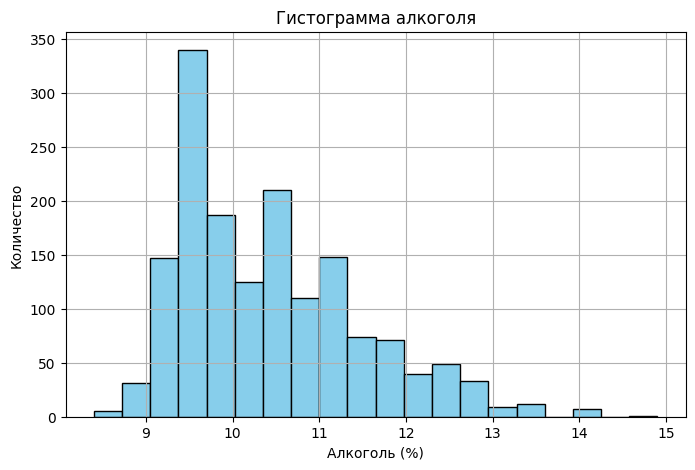

In [34]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(df_wine_filled['alcohol'], bins=20, color='skyblue', edgecolor='black')
plt.title('Гистограмма алкоголя')
plt.xlabel('Алкоголь (%)')
plt.ylabel('Количество')
plt.grid(True)
plt.show()


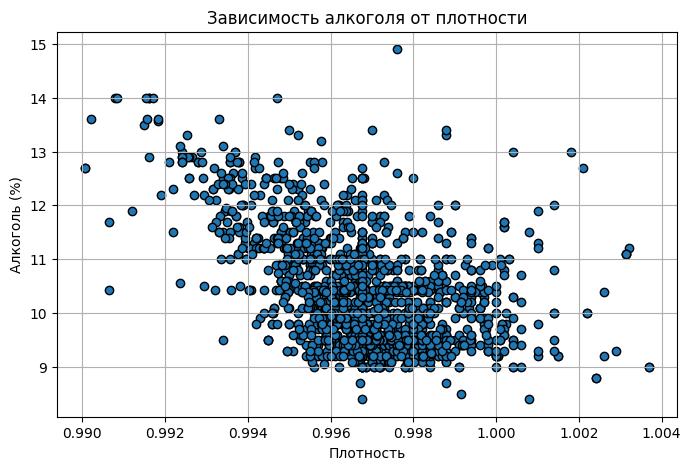

In [35]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(df_wine_filled['density'], df_wine_filled['alcohol'], edgecolor='black')
plt.title('Зависимость алкоголя от плотности')
plt.xlabel('Плотность')
plt.ylabel('Алкоголь (%)')
plt.grid(True)
plt.show()


In [36]:
pearson_corr = df_wine_filled['alcohol'].corr(df_wine_filled['density'], method='pearson')
spearman_corr = df_wine_filled['alcohol'].corr(df_wine_filled['density'], method='spearman')

print(f"Коэффициент Пирсона между alcohol и density: {pearson_corr:.4f}")
print(f"Коэффициент Спирмена между alcohol и density: {spearman_corr:.4f}")


Коэффициент Пирсона между alcohol и density: -0.4851
Коэффициент Спирмена между alcohol и density: -0.4424


In [37]:
df_wine_onehot = pd.get_dummies(df_wine_filled, columns=['quality'], prefix='quality')
df_wine_onehot.head()


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_3.0,quality_4.0,quality_5.0,quality_5.635355512067841,quality_6.0,quality_7.0,quality_8.0
0,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,10.421547,False,False,True,False,False,False,False
1,8.321334,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.800000,False,False,True,False,False,False,False
2,7.800000,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.800000,False,False,True,False,False,False,False
3,11.200000,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.800000,False,False,False,False,True,False,False
4,7.400000,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.400000,False,False,False,True,False,False,False


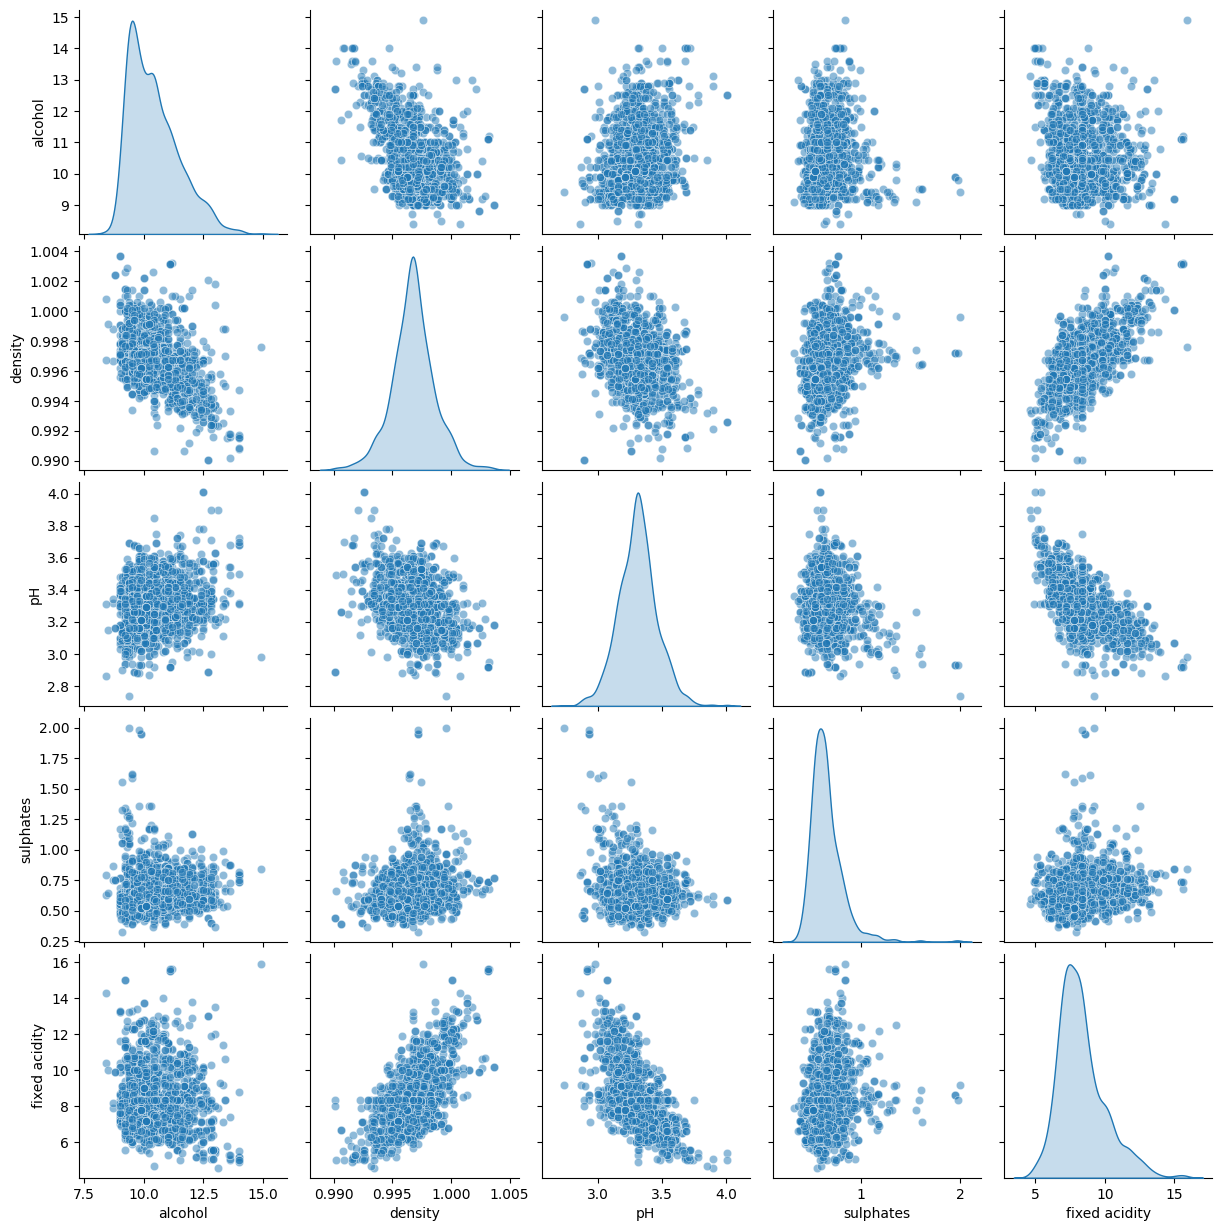

In [38]:
import seaborn as sns
import matplotlib.pyplot as plt

selected_features = ['alcohol', 'density', 'pH', 'sulphates', 'fixed acidity']
sns.pairplot(df_wine_filled[selected_features], diag_kind='kde', plot_kws={'alpha': 0.5})
plt.show()


In [39]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

X = df_wine_filled.drop(columns=['quality'])
y = df_wine_filled['quality']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

models = {
    'LinearRegression': LinearRegression(),
    'Lasso': Lasso(alpha=0.1),
    'Ridge': Ridge(alpha=1.0)
}

mse_results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mse_results[name] = mse
    print(f"{name} MSE: {mse:.4f}")

best = min(mse_results, key=mse_results.get)
print(f"\nЛучшая модель: {best} с MSE = {mse_results[best]:.4f}")


LinearRegression MSE: 0.3947
Lasso MSE: 0.5085
Ridge MSE: 0.3977

Лучшая модель: LinearRegression с MSE = 0.3947
